In [159]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [160]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
from probability.distributions import *

In [162]:
domain_bounds = [(0.0, 5.0)]
bin_counts = [5]
values = np.linspace(0, 1, 5)
values /= np.sum(values)
dist = HistogramDistribution(domain_bounds, bin_counts, values)

print(dist.get_mean())
print(dist.get_covariance())

dist.pdf(np.array([
    [-0.5],
    [0.0],
    [0.5],
    [1.0],
    [1.5],
    [2.0],
    [2.5]
]))


[3.5]
[[1.]]


array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2])

In [163]:
domain_bounds = [(-2.0, +2.0), (-5.0, 5.0)]
bin_counts = [4, 10]      # yields square bins
values = np.ones((4, 10))
values /= np.sum(values)
dist = HistogramDistribution(domain_bounds, bin_counts, values)

print(dist.get_mean())
print(dist.get_covariance())


dist.pdf(np.array([
    [0, 0],
    [0, 1],
    [0, 2]
]))

[-2.77555756e-17 -5.55111512e-17]
[[1.25000000e+00 2.08166817e-17]
 [1.38777878e-17 8.25000000e+00]]


array([0.025, 0.025, 0.025])

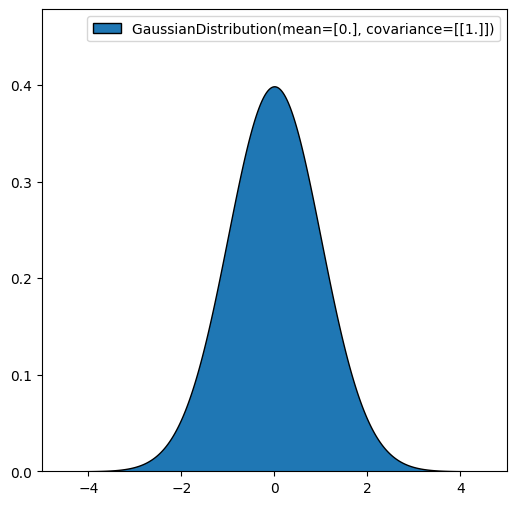

In [164]:
dist = GaussianDistribution(np.array([0.0]), np.array([[1.0]]))
dist.plot()

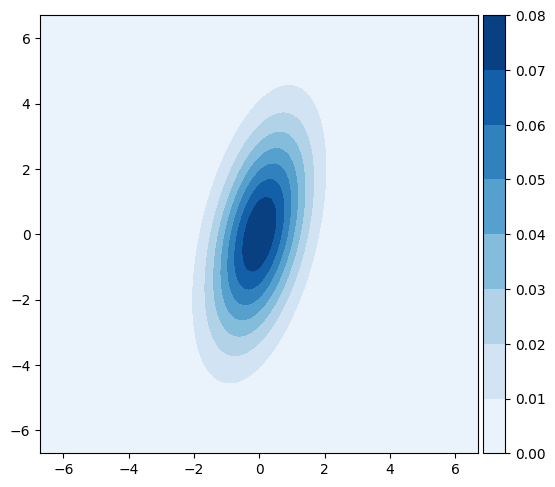

In [165]:
dist = GaussianDistribution(
    np.array([0.0, 0.0]),
    np.array([
        [1.0, 1.0],
        [1.0, 5.0]
    ])
)

# TODO: fix transposed PDF bug
dist.plot(mode_2D="contourf")
# dist.plot(mode_2D="ellipse")

[1.8 3. ]
[[4.36 3.6 ]
 [3.6  7.  ]]


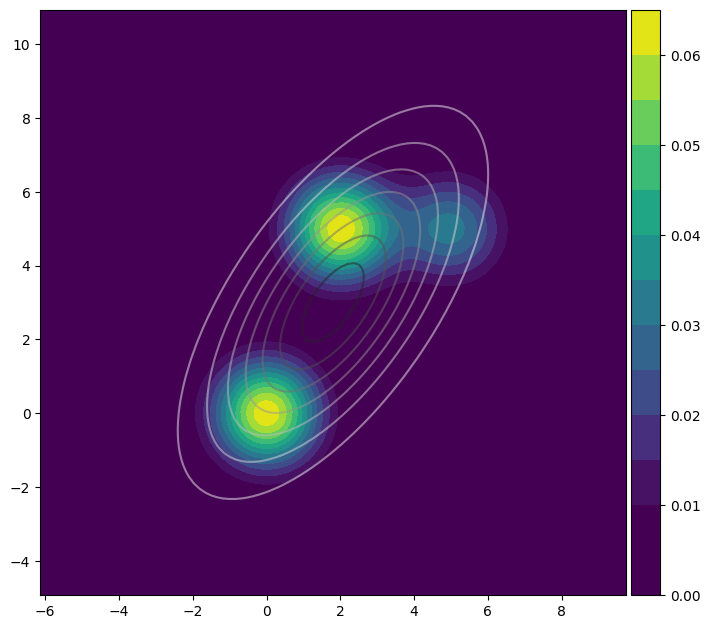

In [205]:
dist = MixtureDistribution([
    GaussianDistribution(np.array([0.0, 0.0]), np.eye(2)),
    GaussianDistribution(np.array([2.0, 5.0]), np.eye(2)),
    GaussianDistribution(np.array([5.0, 5.0]), np.eye(2)),
], [0.4, 0.4, 0.2])
# ], [0.5, 0.5])

mean = dist.get_mean()
cov = dist.get_covariance()
print(mean)
print(cov)

dist_fit = GaussianDistribution(mean, cov)

fig, ax = plt.subplots(figsize=(8,8))
dist.plot(ax, levels=15, cmap="viridis", vmin=0.01)
dist_fit.plot(ax, cmap="Grays", alpha=0.5, contours_filled=False)
# dist_fit.plot(ax, mode_2D="ellipse")

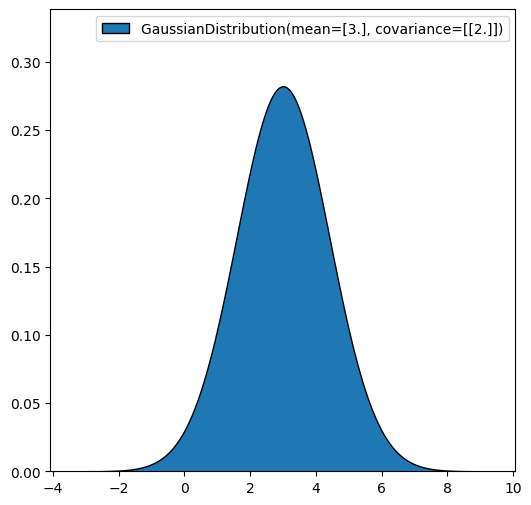

In [167]:
from probability.random_variables import RandomVariable

X = RandomVariable(
    [(-np.inf, +np.inf)],
    GaussianDistribution(np.array([0.0]), np.array([[1.0]]))
)

Y = RandomVariable(
    [(-np.inf, +np.inf)],
    GaussianDistribution(np.array([3.0]), np.array([[1.0]]))
)

Z = X + Y
Z.pdf.plot()